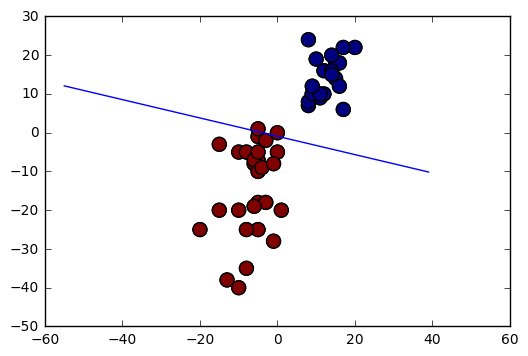

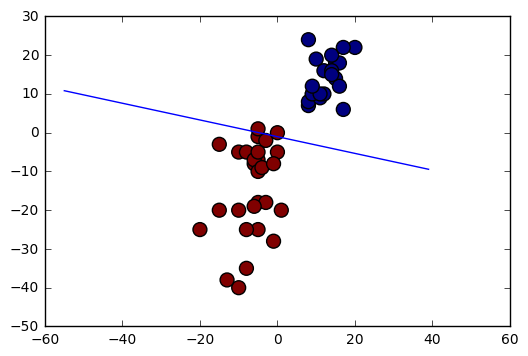

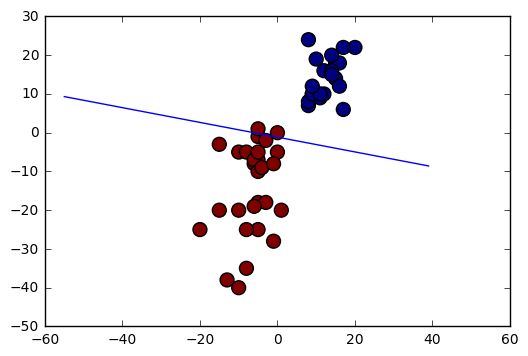

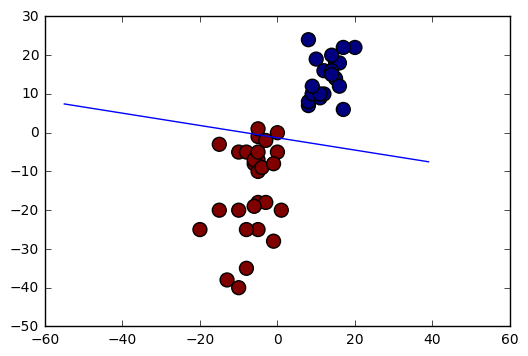

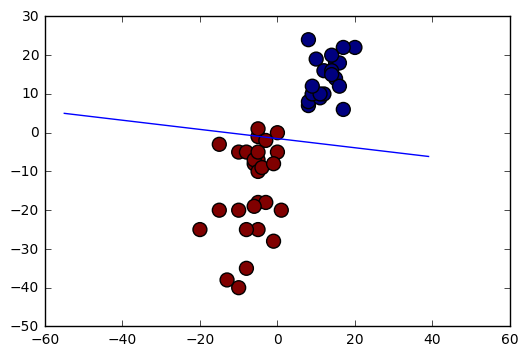

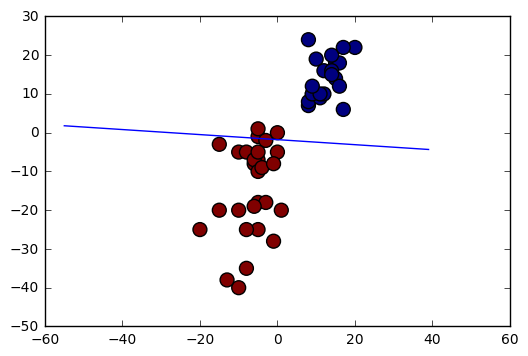

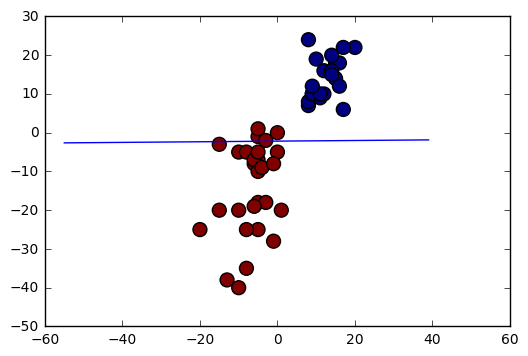

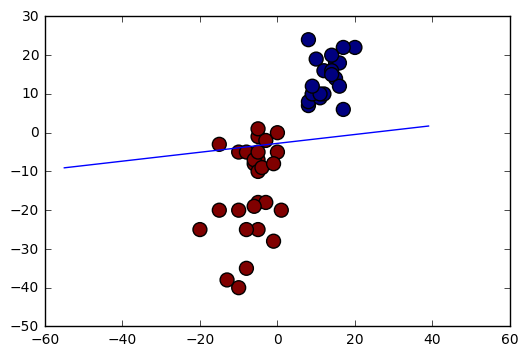

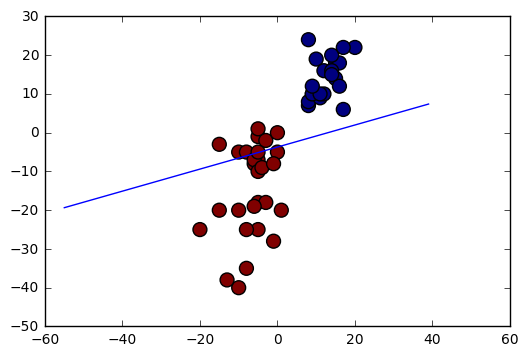

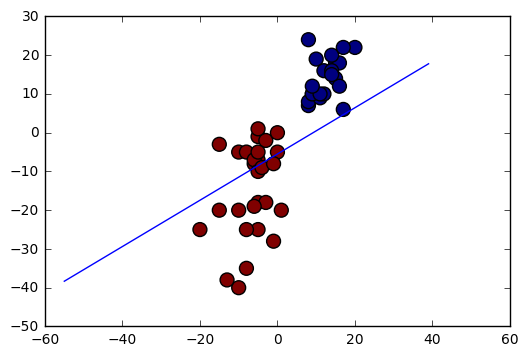

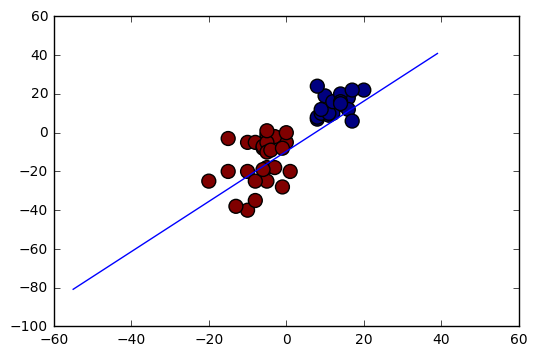

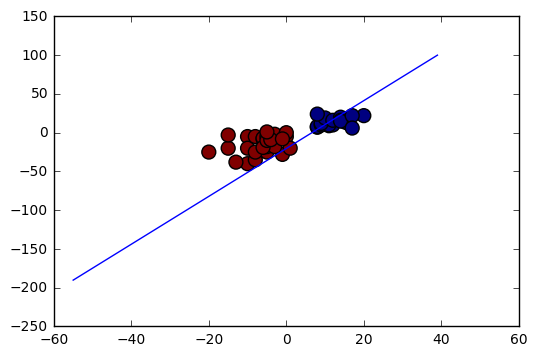

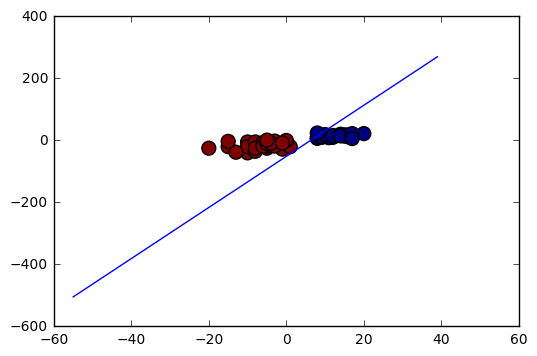

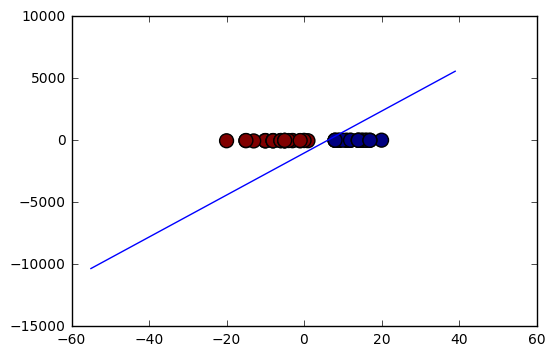

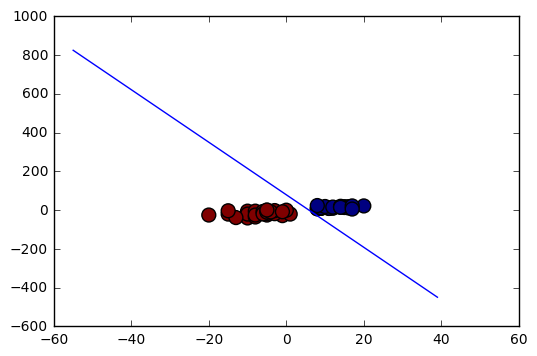

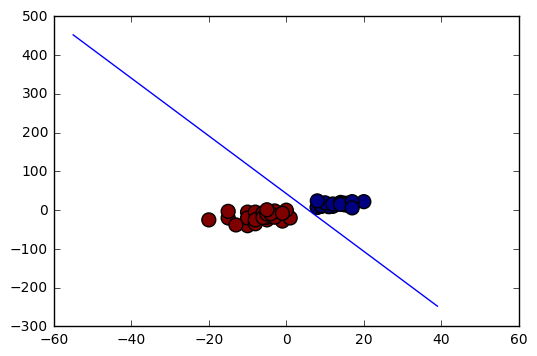

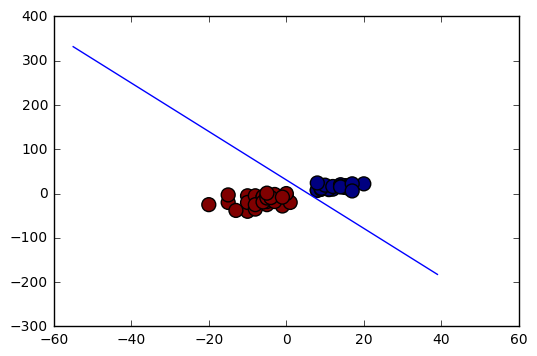

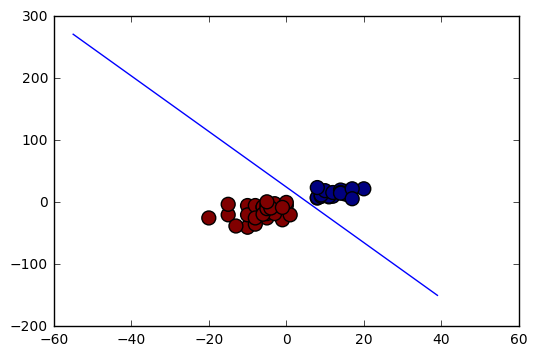

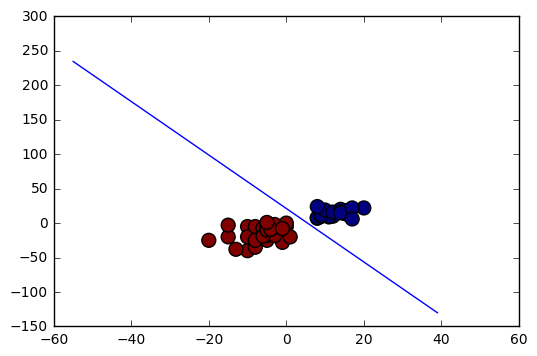

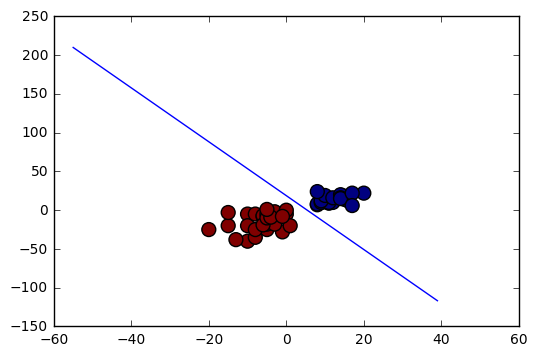

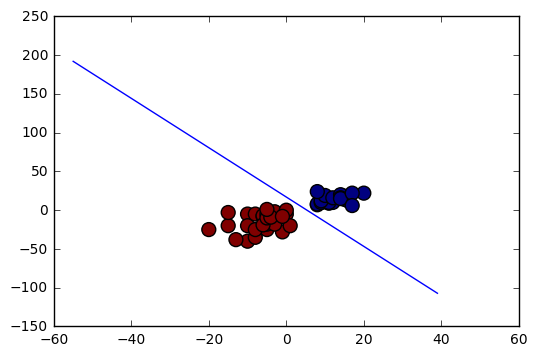

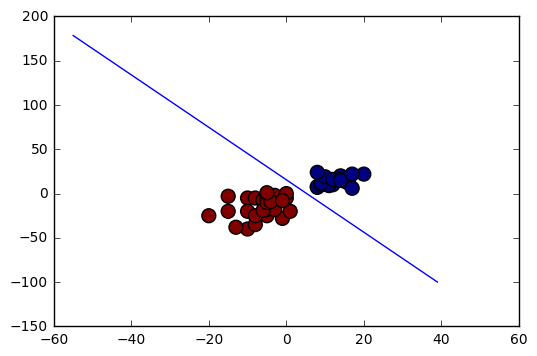

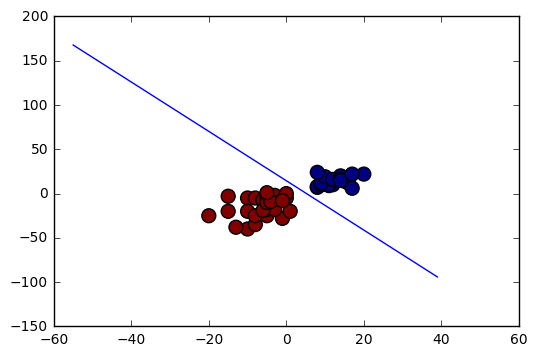

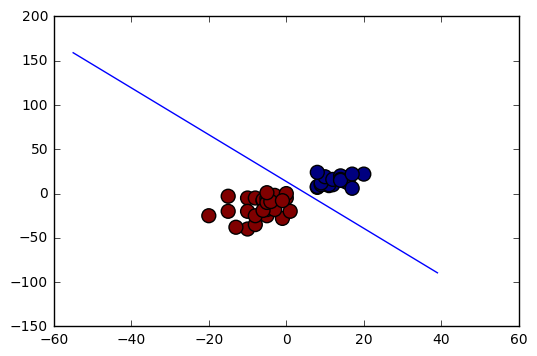

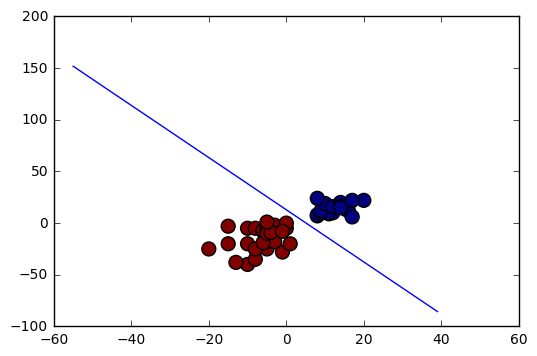

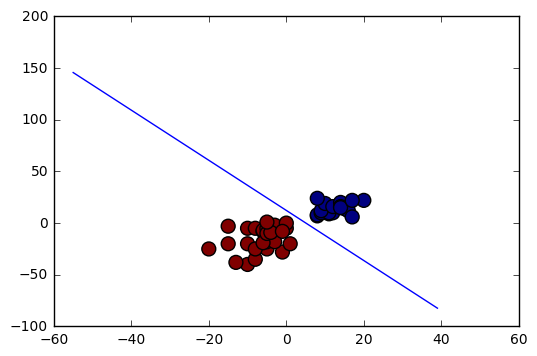

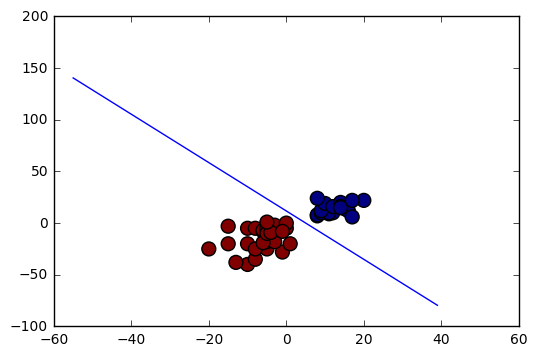

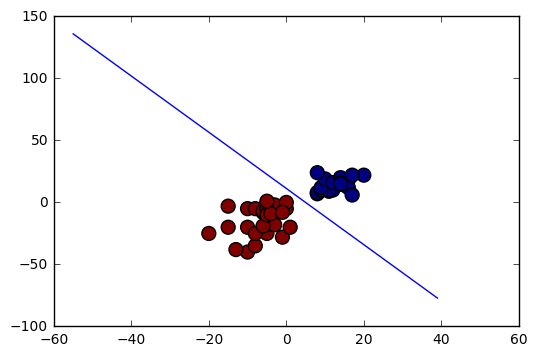

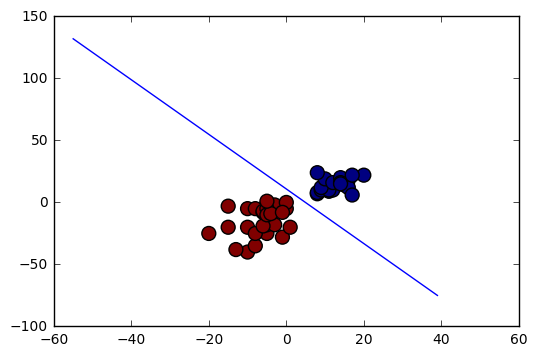

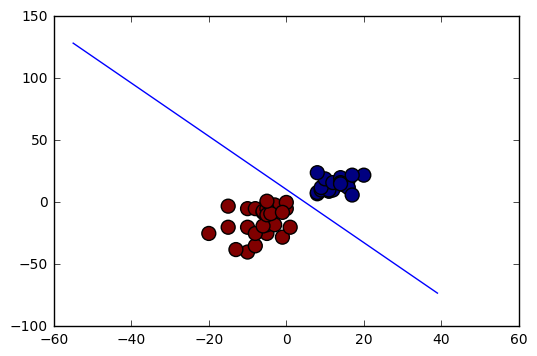

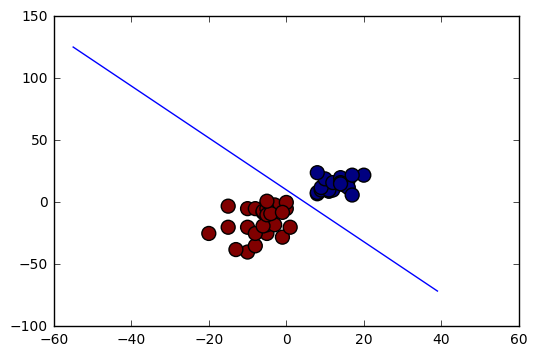

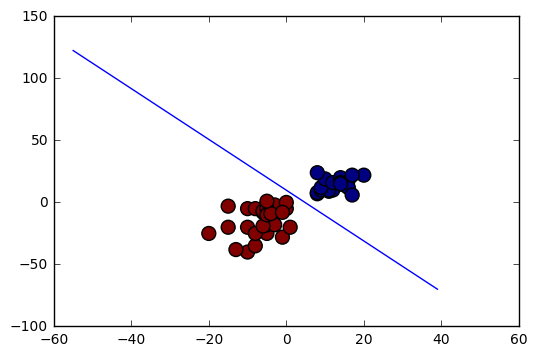

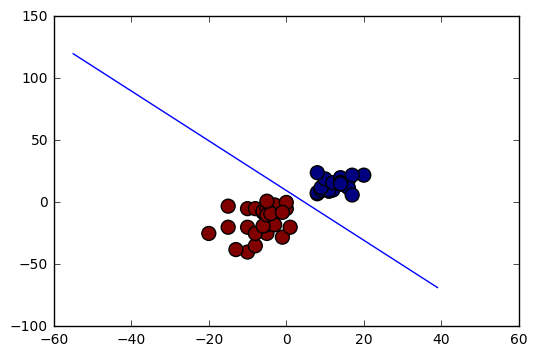

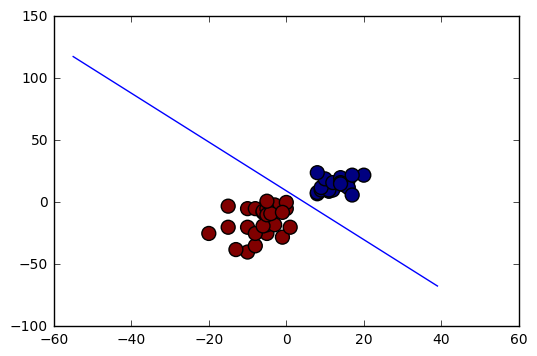

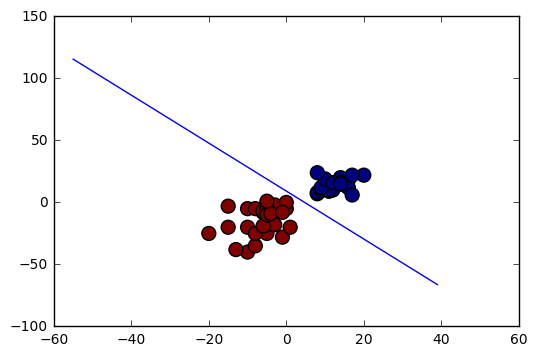

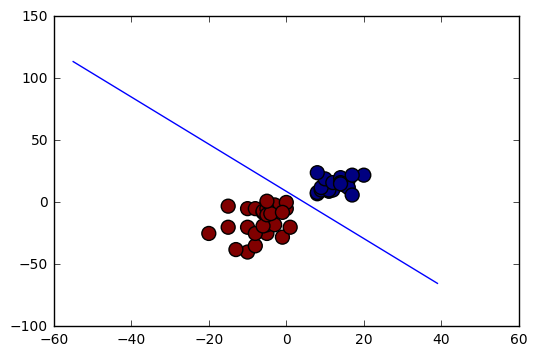

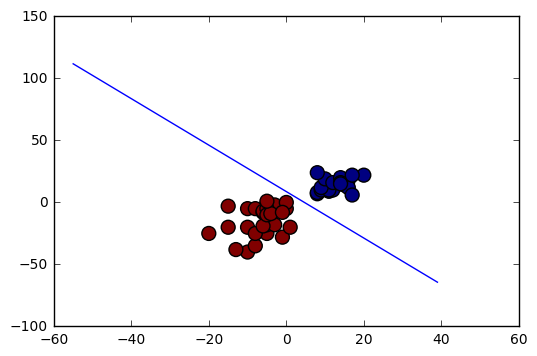

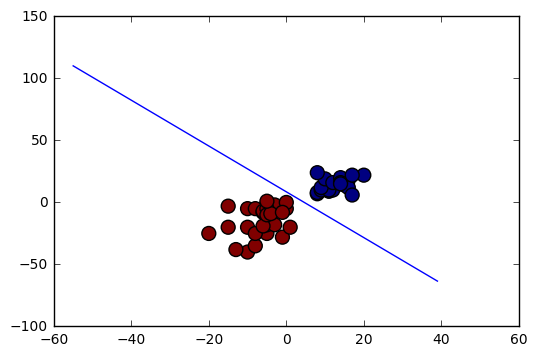

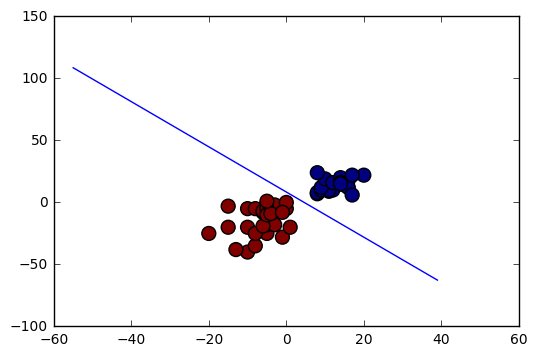

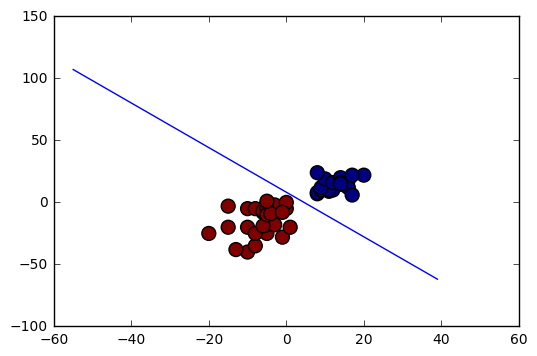

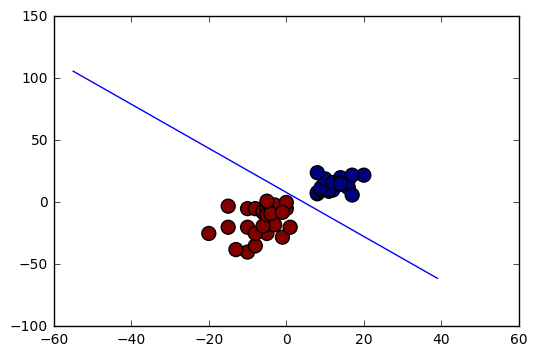

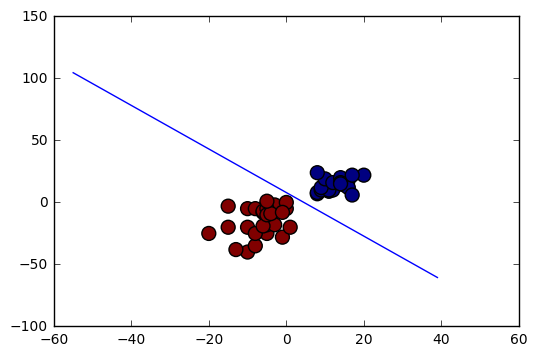

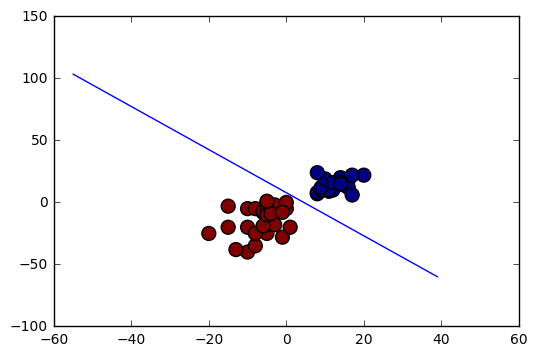

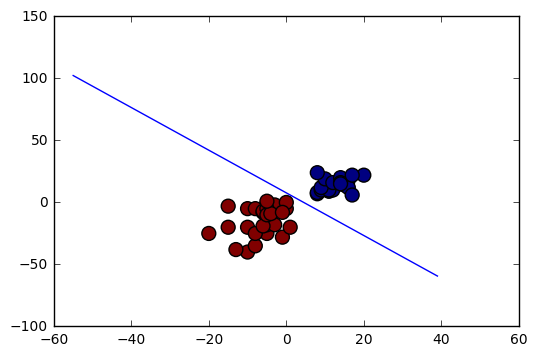

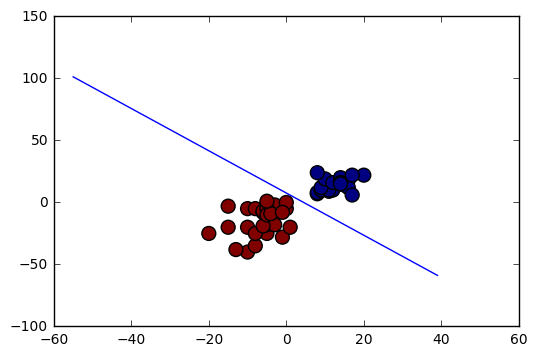

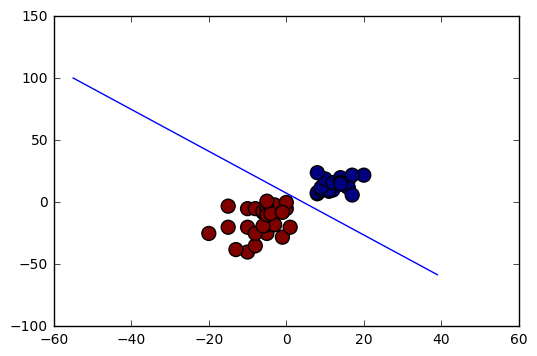

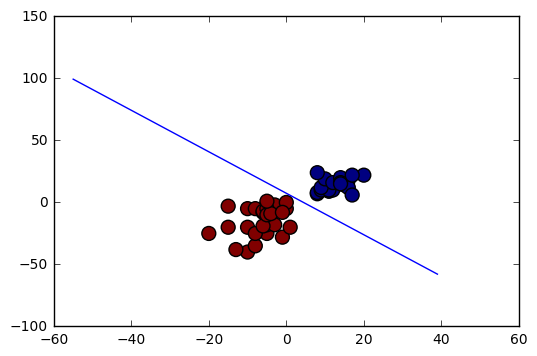

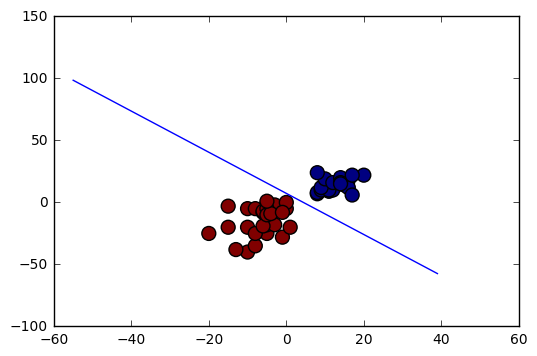

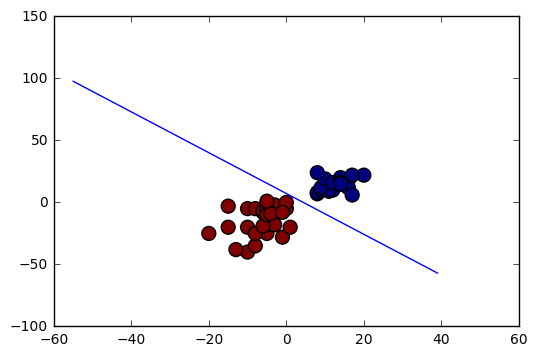

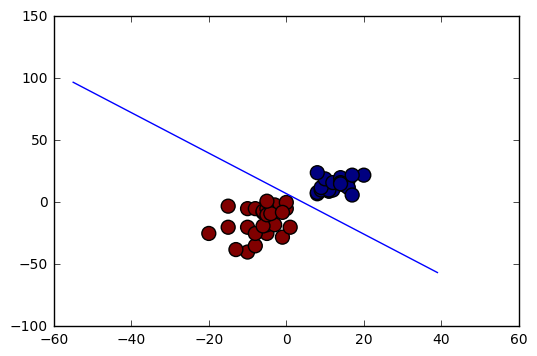

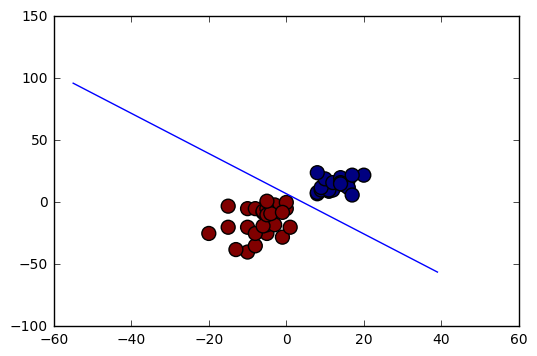

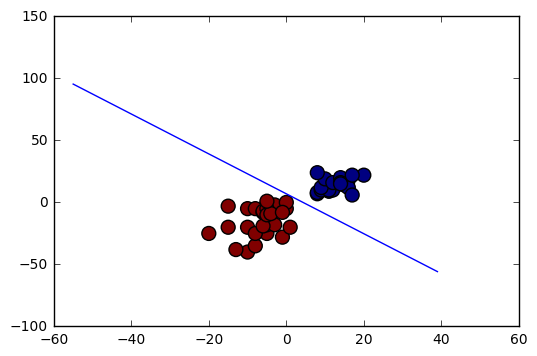

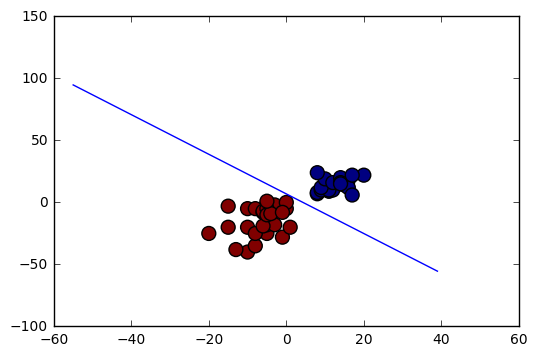

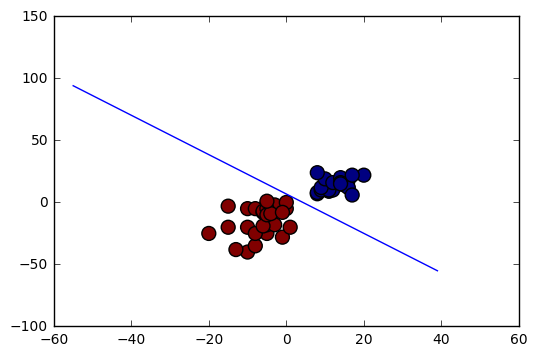

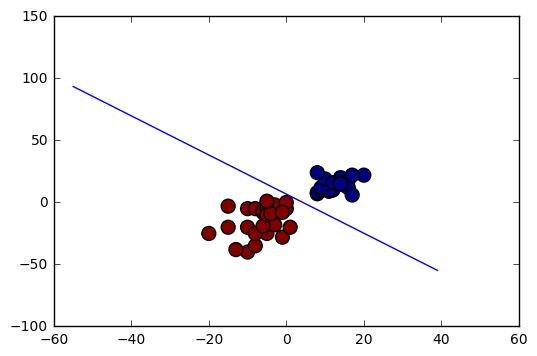

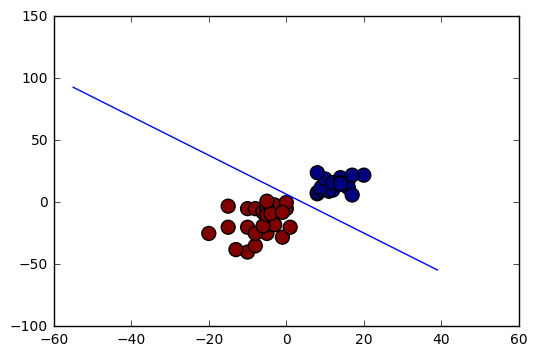

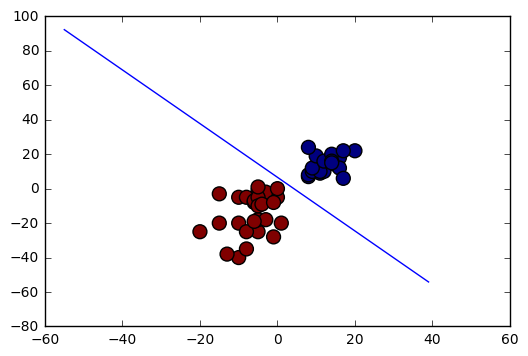

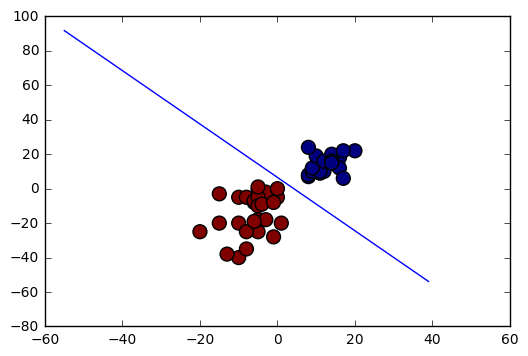

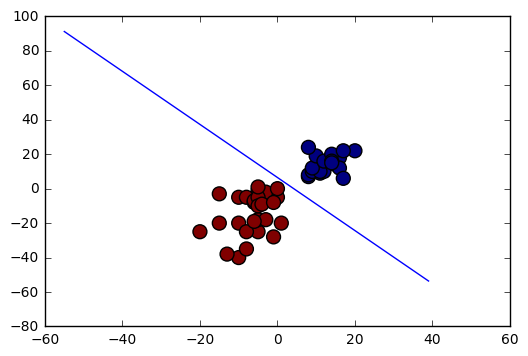

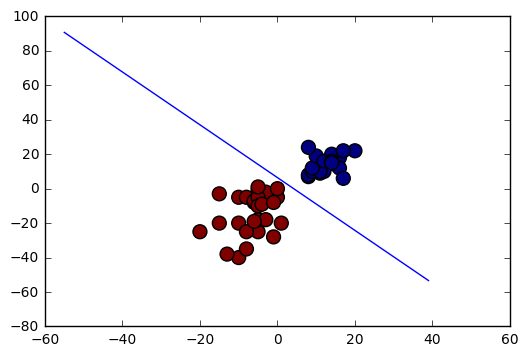

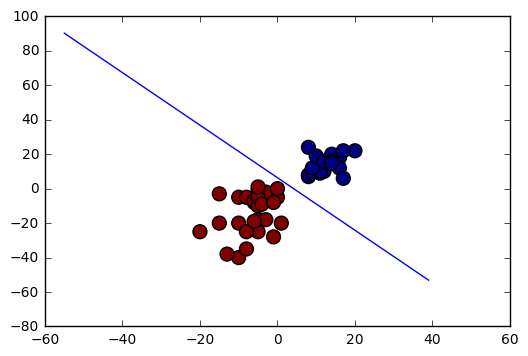

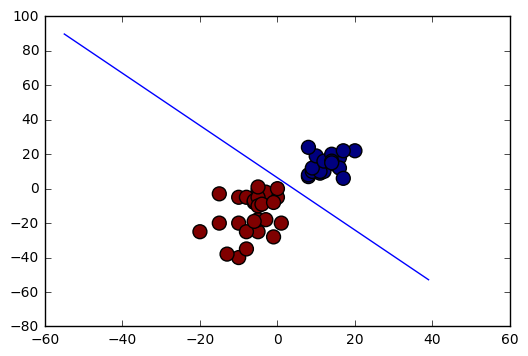

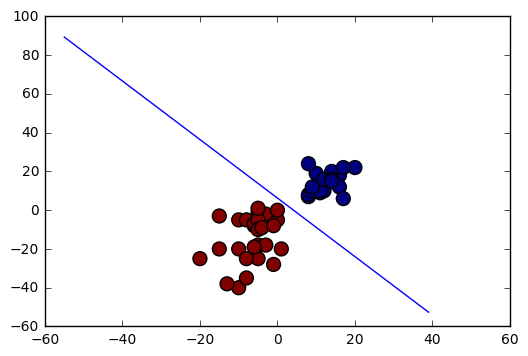

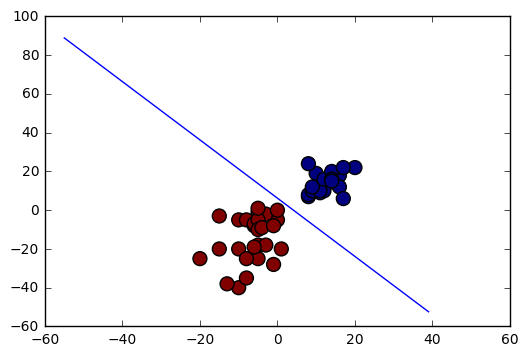

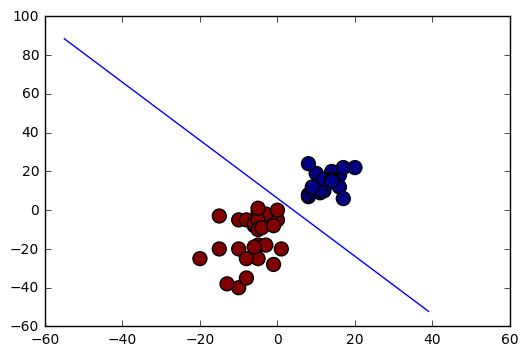

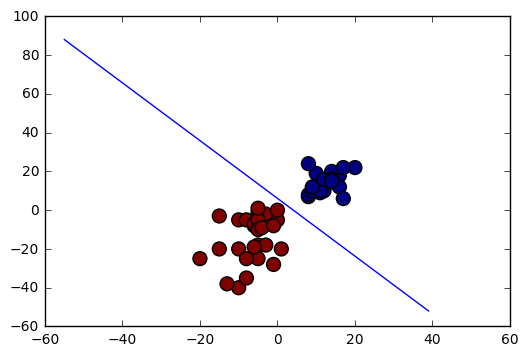

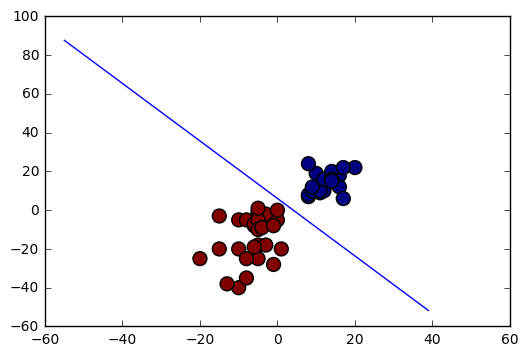

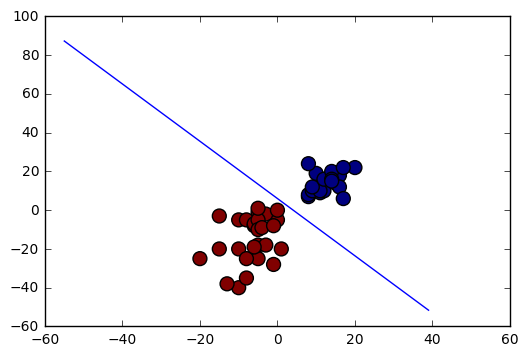

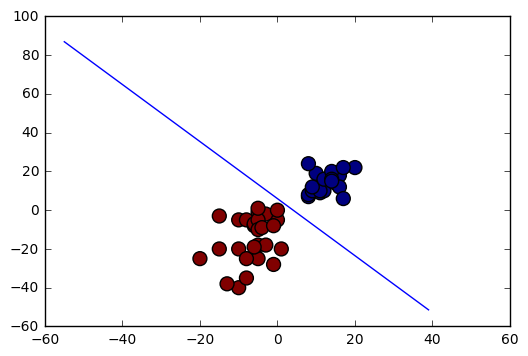

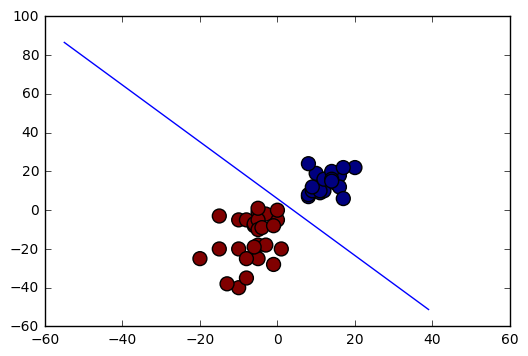

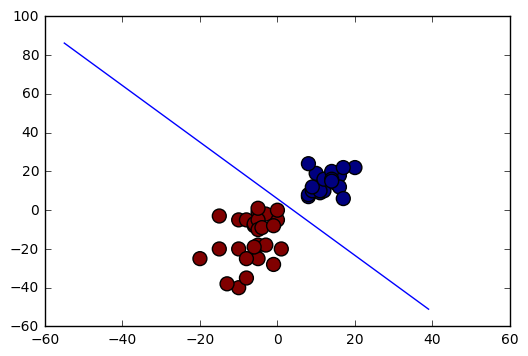

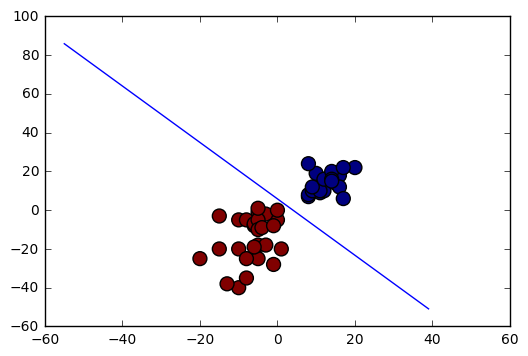

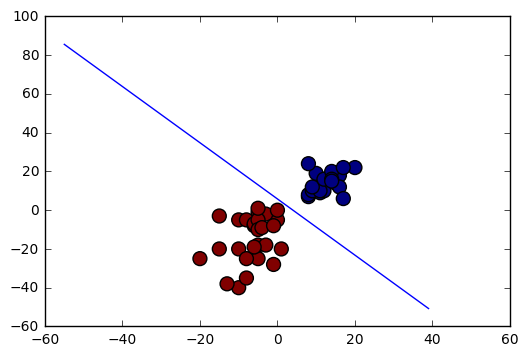

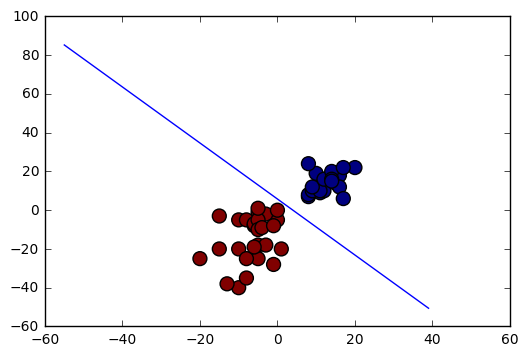

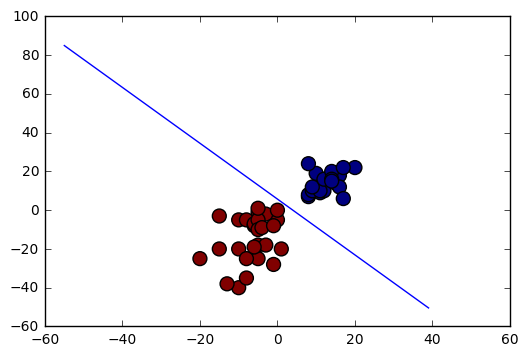

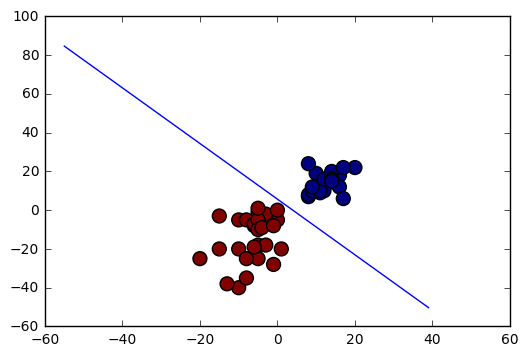

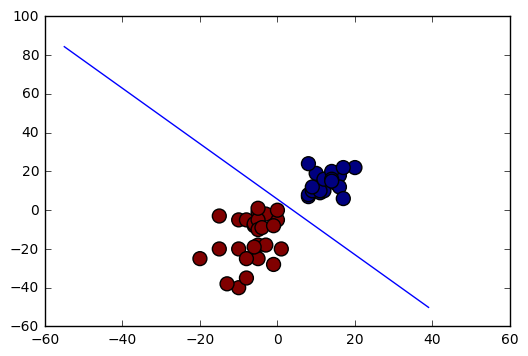

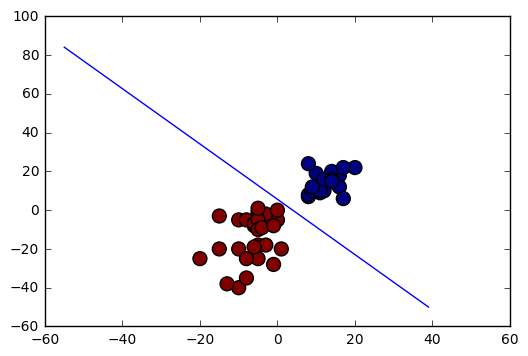

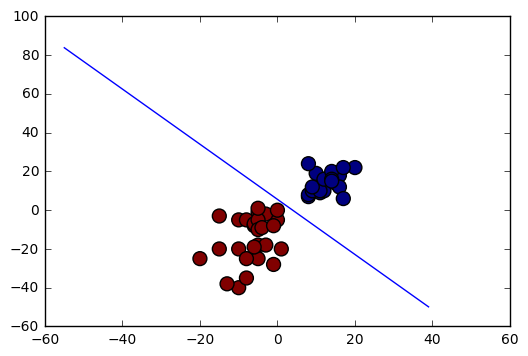

m1= -0.22764690201
m2= -0.160013093726
b= 0.896326836538
0.31824493983


In [2]:
import csv
import matplotlib.pyplot as plt
import math
import random
import numpy as np

data_file = open('cs111-svm-dataset.csv')
reader = csv.reader(data_file)

my_DataList = []

#Create datalist from file
for row in reader: my_DataList.append(row)
#Create lists for x and y values and the labels (going to need this for the scatter plot)
X1=[] 
X2=[] 
labels=[]

#Prepare lists for plot, eliminating the name of the list, turning strings into ints
c=0
for point in my_DataList:
    if c==0:
        X1.append(point[0])
        X2.append(point[1])
        labels.append(point[2])
        c+=1
    else:
        X1.append(int(point[0]))
        X2.append(int(point[1]))
        labels.append(int(point[2]))
del X1[0]
del X2[0]
del labels[0]

#For the SVM I want 1's and -1's rather than 1's and 0's
for i in range (0,len(labels)): 
    if labels[i]=='0': labels[i]='-1'

#plot the points        
def DoPlot(x,y,labels):
    plt.scatter(x,y,c=labels,s=100)
    #plt.show()
    
    
DoPlot(X1,X2,labels)

#Here I define the functions needed to compute error
def f(x1,x2,m1,m2,b):  return m1*x1+m2*x2+b

def L(x1,x2,y,m1,m2,b): return math.log(1+math.exp(-y*f(x1,x2,m1,m2,b)))

def E(m1,m2,b,X1,X2,labels): 
    S=0
    for i in range(0,len(X1)):
        S+=L(X1[i],X2[i],labels[i],m1,m2,b)
    S=S/len(X1)
    return S

#Needed partial derivatives:
# fm1 = x1
# fm2 = x2
# fb = 1

def Lm1(x1,x2,y,m1,m2,b): return  (1/(1+math.exp(y*f(x1,x2,m1,m2,b))))*(-y)*x1
def Lm2(x1,x2,y,m1,m2,b): return  (1/(1+math.exp(y*f(x1,x2,m1,m2,b))))*(-y)*x2 
def Lb(x1,x2,y,m1,m2,b): return   (1/(1+math.exp(y*f(x1,x2,m1,m2,b))))*(-y)*1


#Now partial derivatives of E:
def Em1(m1,m2,b,X1,X2,labels): 
    S=0
    for i in range(0,len(X1)):
        S+=Lm1(X1[i],X2[i],labels[i],m1,m2,b)
    S=S/len(X1)
    return S

def Em2(m1,m2,b,X1,X2,labels): 
    S=0
    for i in range(0,len(X1)):
        S+=Lm2(X1[i],X2[i],labels[i],m1,m2,b)
    S=S/len(X1)
    return S

def Eb(m1,m2,b,X1,X2,labels): 
    S=0
    for i in range(0,len(X1)):
        S+=Lb(X1[i],X2[i],labels[i],m1,m2,b)
    S=S/len(X1)
    return S


precision = 0.001

a=.010 #this is the step size


#random start

m1=random.random()
m2=random.random()
b=random.random()
tempm1=0
tempm2=0
tempb=0

x = np.arange(-55,40)

while abs(m1-tempm1)>precision or abs(m2-tempm2)>precision or abs(b-tempb)>precision:
    tempm1 =m1
    tempm2=m2
    tempb=b

  
    
    m1=m1-a*Em1(tempm1,tempm2,tempb,X1,X2,labels)
    m2=m2-a*Em2(tempm1,tempm2,tempb,X1,X2,labels)
    b=b-a*Eb(tempm1,tempm2,tempb,X1,X2,labels)
    
    line= -m1*x/m2 -b/m2
    plt.plot(x, line, '-')
    DoPlot(X1,X2,labels)
    plt.show()
    
    
print 'm1=',m1
print 'm2=',m2
print 'b=',b
print E(m1,m2,b,X1,X2,labels)